<div class="markdown-google-sans">
  <h2>Mi az a Colab?</h2>
</div>

A Colab, vagyis „Colaboratory” segítségével Python-kódot írhat és futtathat böngészőjében, a következő előnyökkel:
- Nincs szükség konfigurációra
- Díjmentes GPU-hozzáférés
- Egyszerű megosztás

Legyen Ön <strong>hallgató</strong>, <strong>adattudós</strong> vagy <strong>AI-kutató</strong>, a Colab megkönnyítheti a munkáját. Nézze meg a <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Colabot bemutató videót</a>, amelyben további információkat találhat, vagy csak vágjon bele alább!

# Resilient IT


In [ ]:
pip install pm4py

In [190]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/exportgbiall01_05_all4.csv',sep=";",names = ['Timestamp','org:resource','case:concept:name', 'transaction', 'concept:name','dialog_steps',
                                                                        'total response time (s)', 'av_resp_time_per_dialog_steps_in_ms', 'total CPU time(s)', 'average CPU time(ms)', 'total database time(s)'],usecols = [1,2,3,4,5,6,7,8,9,10,11])
print(df)
logcost = pm4py.format_dataframe(df, case_id = 'case:concept:name', activity_key= 'concept:name', timestamp_key= 'Timestamp')
logcost['time:timestamp'] = pd.to_datetime(df.Timestamp)



            Timestamp org:resource  case:concept:name transaction  \
0    2025.03.11 10:28   GBIALL-001                  1        FK01   
1    2025.03.11 10:38   GBIALL-001                  1        FK02   
2    2025.03.11 10:43   GBIALL-001                  1        FB60   
3    2025.03.11 10:49   GBIALL-001                  1       FK10N   
4    2025.03.11 10:51   GBIALL-001                  1       FBL1N   
..                ...          ...                ...         ...   
178  2025.03.11 11:08   GBIALL-027                 27        FK01   
179  2025.03.11 11:09   GBIALL-027                 27        FK02   
180  2025.03.11 11:10   GBIALL-027                 27        FB60   
181  2025.03.11 11:12   GBIALL-027                 27       FK10N   
182  2025.03.11 11:13   GBIALL-027                 27        F-53   

                   concept:name  dialog_steps  total response time (s)  \
0    Create Vendor (Accounting)            25                        5   
1    Change Vendor (Acc

In [175]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'medium',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

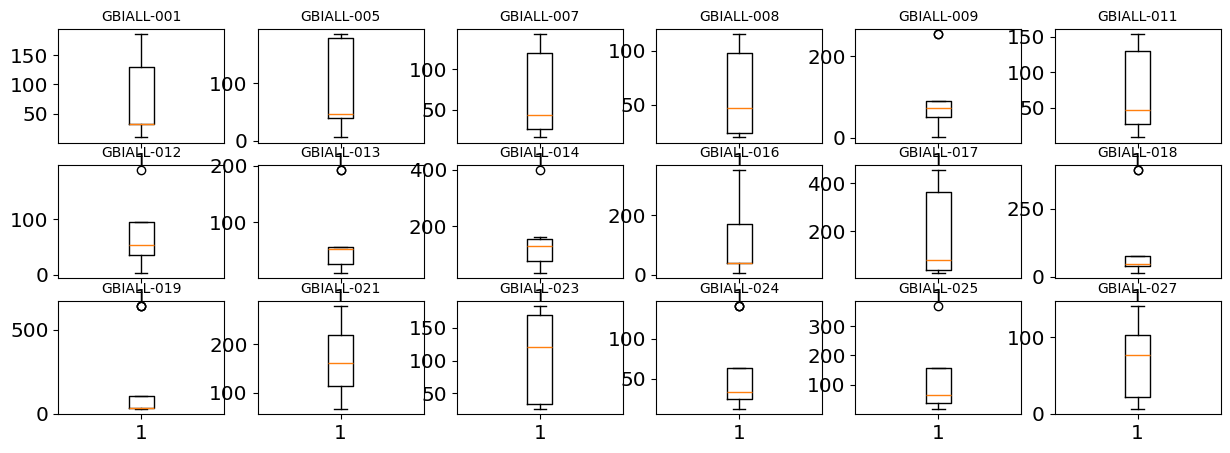

In [176]:
df0 = [x for _, x in df.groupby(df['org:resource'])]
#print(df0[1])
figure, axis = plt.subplots(3, 6)
for x in range(0, len(df0)):
  if x < 6:
    axis[0, x].set_title(df0[x]['org:resource'].values[1])
    axis[0, x].boxplot(df0[x]['dialog_steps'])
  else:
    if x < 12:
      axis[1, x - 6].set_title(df0[x]['org:resource'].values[1])
      axis[1, x - 6].boxplot(df0[x]['dialog_steps'])
    else:
      axis[2, x - 12].set_title(df0[x]['org:resource'].values[1])
      axis[2, x - 12].boxplot(df0[x]['dialog_steps'])
plt.show()



In [ ]:
df0 = [x for _, x in df.groupby(df[''])]
#print(df0[1])
for x in range(0, len(df0)):
  plt.title(df0[x]['concept:name'])
  plt.boxplot(df0[x]['dialog_steps'])
  plt.show()

filtered_dataframe = pm4py.filter_trace_attribute_values(
    log,
    'User',
    ['GBIALL-001'],
    case_id_key='case:concept:name'
)
filtered_dataframe

In [ ]:

for variant, subdf in pm4py.split_by_process_variant(logcost):
    print(variant)  # The definition of that particular variant
    #print(subdf)   ## the sub-dataframe (only that particular variant)
    subdf.to_csv('out.csv')
    print(f"There are {len(subdf)} of the the variant \t {variant}")


In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(logcost, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

In [ ]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_dfg(dfg, start_activities, end_activities)

In [ ]:
transition_system = pm4py.discover_transition_system(log, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_transition_system(transition_system)



In [ ]:
print(pm4py.stats.get_case_duration(logcost, case_id = '8'))

[-2760.0, -2040.0, -1860.0, -1560.0, -720.0, -360.0, 120.0, 240.0, 480.0, 900.0, 960.0, 1320.0, 1500.0, 1560.0, 1680.0, 1920.0, 2640.0, 2940.0]
{'GBIALL-023': 19, 'GBIALL-001': 17, 'GBIALL-005': 16, 'GBIALL-019': 15, 'GBIALL-024': 14, 'GBIALL-007': 12, 'GBIALL-027': 12, 'GBIALL-018': 11, 'GBIALL-009': 10, 'GBIALL-017': 10, 'GBIALL-013': 10, 'GBIALL-008': 8, 'GBIALL-011': 7, 'GBIALL-014': 6, 'GBIALL-016': 5, 'GBIALL-025': 4, 'GBIALL-012': 4, 'GBIALL-021': 3}
{32: 10, 34: 9, 37: 7, 47: 7, 26: 7, 141: 6, 63: 4, 6: 3, 183: 3, 169: 3, 33: 3, 65: 3, 178: 3, 52: 3, 143: 3, 39: 3, 453: 3, 640: 3, 106: 3, 46: 3, 60: 3, 185: 3, 40: 3, 121: 2, 28: 2, 162: 2, 49: 2, 25: 2, 12: 2, 90: 2, 184: 2, 44: 2, 113: 2, 98: 2, 20: 2, 72: 2, 253: 2, 91: 2, 13: 2, 76: 2, 392: 2, 5: 2, 192: 2, 18: 2, 161: 2, 153: 2, 8: 2, 45: 2, 130: 2, 10: 2, 96: 2, 27: 2, 1: 1, 115: 1, 89: 1, 43: 1, 16: 1, 188: 1, 29: 1, 3: 1, 55: 1, 136: 1, 9: 1, 61: 1, 69: 1, 70: 1, 66: 1, 278: 1, 351: 1, 172: 1, 22: 1, 57: 1, 128: 1, 398: 

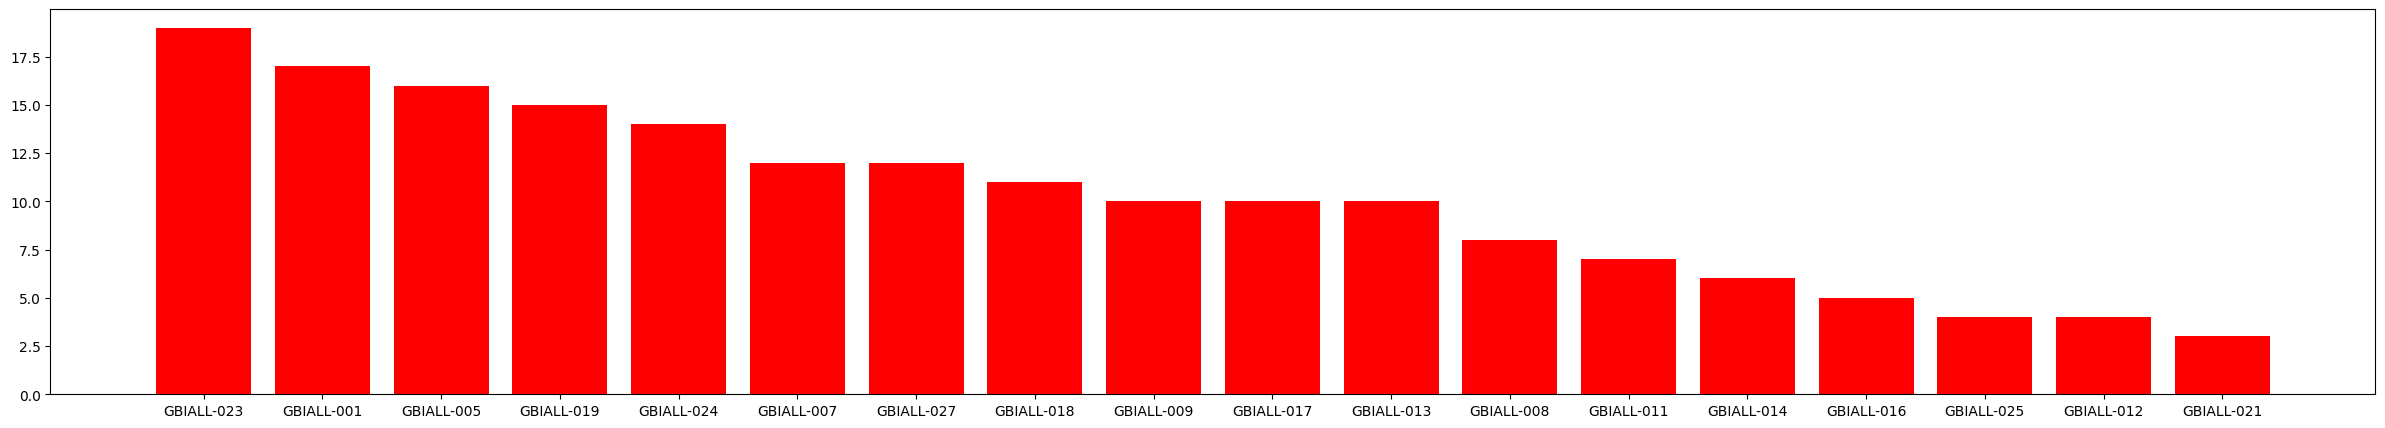

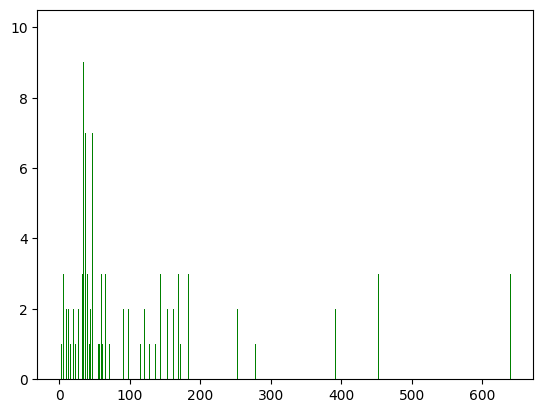

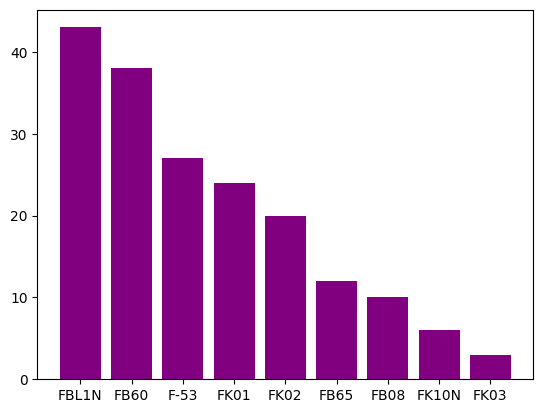

In [143]:
from matplotlib import pyplot as plt
case_duration = pm4py.get_all_case_durations(logcost)
print(case_duration)
attr = pm4py.get_event_attribute_values(logcost, 'org:resource')
attr2 = pm4py.get_event_attribute_values(logcost, 'dialog_steps')
attr3 = pm4py.get_event_attribute_values(logcost, 'transaction')

print(attr)
print(attr2)
x= attr.keys()
y = attr.values()
x2 = attr2.keys()
y2 = attr2.values()
x3 = attr3.keys()
y3 = attr3.values()
plt.figure(figsize=(30, 5))
plt.bar(x, y, color = 'red')
plt.show()
plt.bar(x2, y2, color = 'green')
plt.show()
plt.bar(x3, y3, color = 'purple')
plt.show()

In [ ]:
pm4py.get_start_activities(logcost)

In [ ]:
pm4py.get_end_activities(logcost)

In [ ]:
filt_log2 = pm4py.filter_start_activities(logcost, {'Create Vendor (Accounting)'})
net, initial_marking, final_marking = pm4py.discover_petri_net_inductive(filt_log2, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')
pm4py.view_petri_net(net, initial_marking, final_marking)

bpmn_model = pm4py.discover_bpmn_inductive(filt_log2)
pm4py.view_bpmn(bpmn_model)

map = pm4py.discover_heuristics_net(filt_log2)
pm4py.view_heuristics_net(map)

In [ ]:
filtered_log = pm4py.filter_trace_attribute_values(
    logcost,
    'User',
    ['GBIALL-016'],
    case_id_key='case:concept:name'
)
map = pm4py.discover_heuristics_net(filtered_log)
pm4py.view_heuristics_net(map)


In [ ]:
process_tree = pm4py.discover_process_tree_inductive(logcost)
pm4py.view_process_tree(process_tree)

# Feldolgozás

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfgcost = dfg_discovery.apply(logcost)
from pm4py.visualization.dfg import visualizer as dfg_visualization
gviz = dfg_visualization.apply(dfgcost, log=logcost, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)


In [ ]:


dfg = pm4py.discover_dfg(logcost)
print(len(dfg))
for df2 in dfg:
  print(df2)
  print('\n')

In [ ]:
for i in range(0, len(logcost)-1):
  print(logcost['concept:name'][i] + "      " + logcost['concept:name'][i+1])

In [ ]:
logcost

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(logcost, variant=dfg_discovery.Variants.FREQUENCY)
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)
print(dfg[('Change Document', 'Reverse Document')])
dfg[('Change Document', 'Reverse Document')] =6
gviz = dfg_visualization.apply(dfg, log=logcost,  variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)